In [5]:
from DidiDataset import DidiTrajectoryDataset
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
dataset = DidiTrajectoryDataset('E:/Data/Didi/xian/nov', traj_length=200, lat_mean=1, lat_std=1, lon_mean=1, lon_std=1)

In [3]:
stats = torch.zeros(dataset.n_files, 4)     # lat mean, lon mean, lat std, lon std
while dataset.loadNextFiles(1):
    print(f"Dataset {dataset.part_idx} has length {len(dataset)}")
    points = torch.cat([traj for traj, _ in dataset], dim=1)
    stats[dataset.part_idx-1] = torch.cat([points.mean(dim=1), points.std(dim=1)])
print(stats)

Loading E:/Data/Didi/xian/nov\gps_20161101.pt
Dataset 1 has length 50913
Loading E:/Data/Didi/xian/nov\gps_20161102.pt
Dataset 2 has length 27711
Loading E:/Data/Didi/xian/nov\gps_20161103.pt
Dataset 3 has length 54043
Loading E:/Data/Didi/xian/nov\gps_20161104.pt
Dataset 4 has length 61244
Loading E:/Data/Didi/xian/nov\gps_20161105.pt
Dataset 5 has length 66740
Loading E:/Data/Didi/xian/nov\gps_20161106.pt
Dataset 6 has length 55248
Loading E:/Data/Didi/xian/nov\gps_20161107.pt
Dataset 7 has length 51717
Loading E:/Data/Didi/xian/nov\gps_20161108.pt
Dataset 8 has length 51735
Loading E:/Data/Didi/xian/nov\gps_20161109.pt
Dataset 9 has length 51317
Loading E:/Data/Didi/xian/nov\gps_20161110.pt
Dataset 10 has length 51398
Loading E:/Data/Didi/xian/nov\gps_20161111.pt
Dataset 11 has length 61886
Loading E:/Data/Didi/xian/nov\gps_20161112.pt
Dataset 12 has length 60044
Loading E:/Data/Didi/xian/nov\gps_20161113.pt
Dataset 13 has length 49220
Loading E:/Data/Didi/xian/nov\gps_20161114.pt
D

IndexError: index 30 is out of bounds for dimension 0 with size 30

In [13]:
stats = stats[1:]
stats

array([[1.08949730e+02, 3.42433395e+01, 2.29253713e-02, 1.92759242e-02],
       [1.08950119e+02, 3.42424889e+01, 2.26248633e-02, 1.91171300e-02],
       [1.08950119e+02, 3.42423630e+01, 2.21607573e-02, 1.92763638e-02],
       [1.08950729e+02, 3.42424850e+01, 2.19680071e-02, 1.92050859e-02],
       [1.08951805e+02, 3.42414131e+01, 2.21953187e-02, 1.95180252e-02],
       [1.08950394e+02, 3.42424850e+01, 2.25324444e-02, 1.94629822e-02],
       [1.08949097e+02, 3.42431946e+01, 2.25522295e-02, 1.93582810e-02],
       [1.08950333e+02, 3.42435188e+01, 2.23812573e-02, 1.95547789e-02],
       [1.08950409e+02, 3.42431259e+01, 2.21602898e-02, 1.91770010e-02],
       [1.08950256e+02, 3.42432327e+01, 2.16550864e-02, 1.93771552e-02],
       [1.08949890e+02, 3.42438049e+01, 2.22273581e-02, 1.96402948e-02],
       [1.08951149e+02, 3.42426300e+01, 2.22492032e-02, 1.98838618e-02],
       [1.08950470e+02, 3.42432594e+01, 2.23338697e-02, 1.92205422e-02],
       [1.08950134e+02, 3.42439384e+01, 2.14573536e

In [15]:
weights = [27711, 54043, 61244, 66740, 55248, 51717, 51735, 51317, 51398, 61886, 60044, 49220, 43613, 39774, 44655, 47617, 53618, 61370, 52549, 50501, 42739, 44820, 52629, 62631, 65387, 53658, 51428, 52284, 51176]
weights = np.array(weights)
weights = weights / weights.sum()
print(len(weights))
print(stats.shape)
print(weights)

29
(29, 4)
[0.01831827 0.03572496 0.04048516 0.04411827 0.03652152 0.03418736
 0.03419926 0.03392294 0.03397649 0.04090955 0.0396919  0.03253673
 0.02883024 0.02629248 0.02951905 0.03147707 0.03544401 0.04056845
 0.03473735 0.03338353 0.02825248 0.02962812 0.03479024 0.04140203
 0.04322387 0.03547045 0.03399632 0.03456218 0.03382974]


In [6]:
stats = stats.numpy()

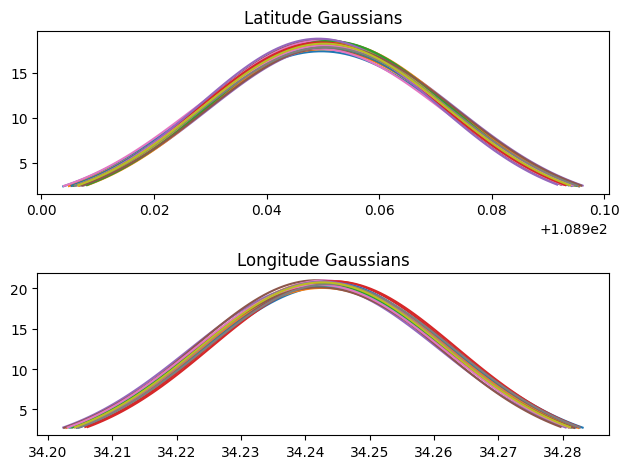

In [17]:

plt.subplot(2, 1, 1)
plt.title("Latitude Gaussians")
# Plot latitude Gaussians
lat_means = stats[:, 0]
lat_stds = stats[:, 2]
for i in range(len(lat_means)):
    x = np.linspace(lat_means[i] - 2 * lat_stds[i], lat_means[i] + 2 * lat_stds[i], 100)
    fx = np.exp(-(x - lat_means[i]) ** 2 / (2 * lat_stds[i] ** 2)) / (lat_stds[i] * np.sqrt(2 * np.pi))
    plt.plot(x, fx)


plt.subplot(2, 1, 2)
plt.title("Longitude Gaussians")
lon_means = stats[:, 1]
lon_stds = stats[:, 3]
for i in range(len(lon_means)):
    x = np.linspace(lon_means[i] - 2 * lon_stds[i], lon_means[i] + 2 * lon_stds[i], 100)
    fx = np.exp(-(x - lon_means[i]) ** 2 / (2 * lon_stds[i] ** 2)) / (lon_stds[i] * np.sqrt(2 * np.pi))
    plt.plot(x, fx)

# parser layout
plt.tight_layout()
plt.show()


In [20]:
overll_lat_mean = (lat_means * weights).sum()
overll_lon_mean = (lon_means * weights).sum()
overall_lat_std = np.sqrt(np.sum(weights * (lat_stds ** 2 + lat_means ** 2)) - overll_lat_mean ** 2)
overall_lon_std = np.sqrt(np.sum(weights * (lon_stds ** 2 + lon_means ** 2)) - overll_lon_mean ** 2)
print(f"Overall latitude mean: {overll_lat_mean}, std: {overall_lat_std}")
print(f"Overall longitude mean: {overll_lon_mean}, std: {overall_lon_std}")

Overall latitude mean: 108.95038635089452, std: 0.02245034359640356
Overall longitude mean: 34.242824702030525, std: 0.019082048008517993


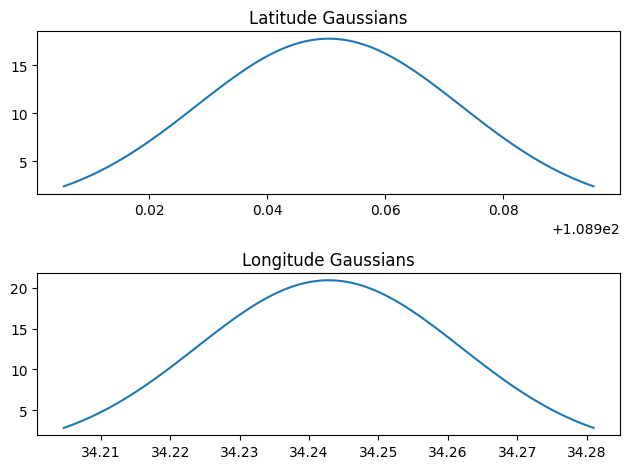

In [19]:
plt.subplot(2, 1, 1)
plt.title("Latitude Gaussians")
x = np.linspace(overll_lat_mean - 2 * overall_lat_std, overll_lat_mean + 2 * overall_lat_std, 100)
fx = np.exp(-(x - overll_lat_mean) ** 2 / (2 * overall_lat_std ** 2)) / (overall_lat_std * np.sqrt(2 * np.pi))
plt.plot(x, fx)

plt.subplot(2, 1, 2)
plt.title("Longitude Gaussians")
x = np.linspace(overll_lon_mean - 2 * overall_lon_std, overll_lon_mean + 2 * overall_lon_std, 100)
fx = np.exp(-(x - overll_lon_mean) ** 2 / (2 * overall_lon_std ** 2)) / (overall_lon_std * np.sqrt(2 * np.pi))
plt.plot(x, fx)

plt.tight_layout()
plt.show()